# Preprocessing

Loading the data and performing some initial exploration on it to acquire some basic knowledge about the data, how the various features are distributed.

<a id="importing"></a>
## Importing libraries and packages

In [1]:
# Mathematical operations and data manipulation
import pandas as pd

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Warnings
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

<a id="set-paths"></a>
## Set paths

In [2]:
# Path to datasets directory
data_path = "./datasets"
# Path to assets directory (for saving results to)
assets_path = "./assets"

<a id="loading-data"></a>
## Loading dataset

In [3]:
# load data
dataset = pd.read_csv(f"{data_path}/hour.csv")
dataset.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

<a id="exploring-data"></a>
## Exploring dataset

In [4]:
# Shape and missing data
print(f"Shape of data: {dataset.shape}")
print(f"Number of missing values in the data: {dataset.isnull().sum().sum()}")

# Statistics on the numerical columns
dataset.describe().T

Shape of data: (17379, 17)
Number of missing values in the data: 0


count         mean          std   min        25%        50%  \
instant     17379.0  8690.000000  5017.029500  1.00  4345.5000  8690.0000   
season      17379.0     2.501640     1.106918  1.00     2.0000     3.0000   
yr          17379.0     0.502561     0.500008  0.00     0.0000     1.0000   
mnth        17379.0     6.537775     3.438776  1.00     4.0000     7.0000   
hr          17379.0    11.546752     6.914405  0.00     6.0000    12.0000   
holiday     17379.0     0.028770     0.167165  0.00     0.0000     0.0000   
weekday     17379.0     3.003683     2.005771  0.00     1.0000     3.0000   
workingday  17379.0     0.682721     0.465431  0.00     0.0000     1.0000   
weathersit  17379.0     1.425283     0.639357  1.00     1.0000     1.0000   
temp        17379.0     0.496987     0.192556  0.02     0.3400     0.5000   
atemp       17379.0     0.475775     0.171850  0.00     0.3333     0.4848   
hum         17379.0     0.627229     0.192930  0.00     0.4800     0.6300   
windspeed   17379.0     0.190098     0.122340  0.00     0.1045     0.1940   
casual      17379.0    35.676218    49.305030  0.00     4.0000    17.0000   
registered  17379.0   153.786869   151.357286  0.00    34.0000   115.0000   
cnt         17379.0   189.463088   181.387599  1.00    40.0000   142.0000   

                   75%         max  
instant     13034.5000  17379.0000  
season          3.0000      4.0000  
yr              1.0000      1.0000  
mnth           10.0000     12.0000  
hr             18.0000     23.0000  
holiday         0.0000      1.0000  
weekday         5.0000      6.0000  
workingday      1.0000      1.0000  
weathersit      2.0000      4.0000  
temp            0.6600      1.0000  
atemp           0.6212      1.0000  
hum             0.7800      1.0000  
windspeed       0.2537      0.8507  
casual         48.0000    367.0000  
registered    220.0000    886.0000  
cnt           281.0000    977.0000

<a id="preprocessing"></a>
## Preprocessing temporal and weather features

In [5]:
def transform_seasons(data):
    # Tranforming seasons
    seasons_mapping = {1: "winter", 2: "spring", 3: "summer", 4: "fall"}
    data["season"] = data["season"].apply(lambda x: seasons_mapping[x])
    return data


def transform_yr(data):
    # Transforming yr
    yr_mapping = {0: 2011, 1: 2012}
    data["yr"] = data["yr"].apply(lambda x: yr_mapping[x])
    return data


def transform_weekday(data):
    # Transforming weekday
    weekday_mapping = {
        0: "Sunday",
        1: "Monday",
        2: "Tuesday",
        3: "Wednesday",
        4: "Thursday",
        5: "Friday",
        6: "Saturday",
    }
    data["weekday"] = data["weekday"].apply(lambda x: weekday_mapping[x])
    return data


def transform_weathersit(data):
    # Transforming weathersit
    weather_mapping = {
        1: "clear",
        2: "cloudy",
        3: "light_rain_snow",
        4: "heavy_rain_snow",
    }
    data["weathersit"] = data["weathersit"].apply(lambda x: weather_mapping[x])
    return data


def transform_hum(data):
    # Transorming humidity
    data["hum"] = data["hum"] * 100
    return data


def transform_windspeed(data):
    # Transorming windspeed
    data["windspeed"] = data["windspeed"] * 67
    return data


def preprocess(data):
    data = transform_seasons(data)
    data = transform_yr(data)
    data = transform_weekday(data)
    data = transform_weathersit(data)
    data = transform_hum(data)
    data = transform_windspeed(data)
    return data


preprocessed_data = preprocess(dataset)
preprocessed_data.to_csv(f"{data_path}/preprocessed_hour.csv", index=False)

In [6]:
# Visualizing preprocessed columns
cols = ["season", "yr", "weekday", "weathersit", "hum", "windspeed"]
preprocessed_data[cols].sample(10, random_state=42)

season    yr    weekday weathersit   hum  windspeed
12830  summer  2012   Saturday      clear  27.0    12.9980
8688   winter  2012     Monday      clear  41.0    15.0013
7091     fall  2011     Friday      clear  66.0    19.0012
12230  spring  2012    Tuesday      clear  52.0    23.9994
431    winter  2011   Thursday      clear  56.0    26.0027
1086   winter  2011     Friday      clear  72.0    19.0012
11605  spring  2012   Thursday      clear  58.0     8.9981
7983     fall  2011     Sunday      clear  87.0     0.0000
10391  winter  2012  Wednesday      clear  68.0    12.9980
7046     fall  2011  Wednesday      clear  71.0    15.0013

<a id="registered-vs-casual"></a>
## Registered vs casual use analysis

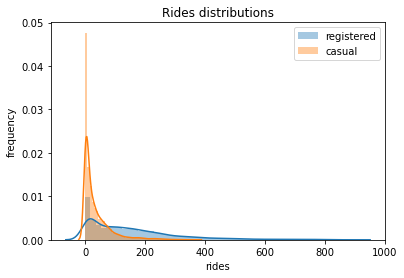

In [7]:
# Plotting distributions of registered vs casual rides
sns.distplot(preprocessed_data["registered"], label="registered")
sns.distplot(preprocessed_data["casual"], label="casual")
plt.legend()
plt.xlabel("rides")
plt.ylabel("frequency")
plt.title("Rides distributions")
plt.savefig(f"{assets_path}/rides_distributions.png", format="png")

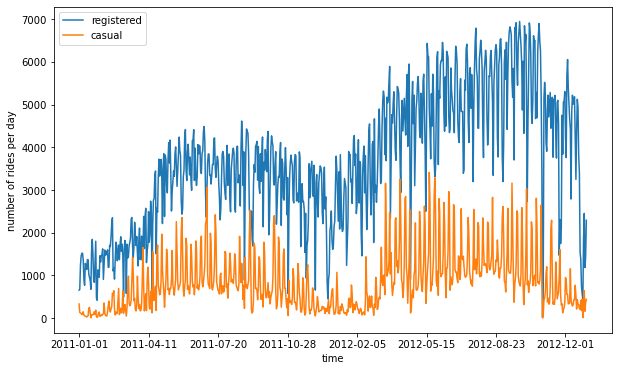

In [8]:
# Plotting rides over time
plot_data = preprocessed_data[["registered", "casual", "dteday"]]
ax = plot_data.groupby("dteday").sum().plot(figsize=(10, 6))
ax.set_xlabel("time")
ax.set_ylabel("number of rides per day")

plt.savefig(f"{assets_path}/rides_daily.png", format="png")

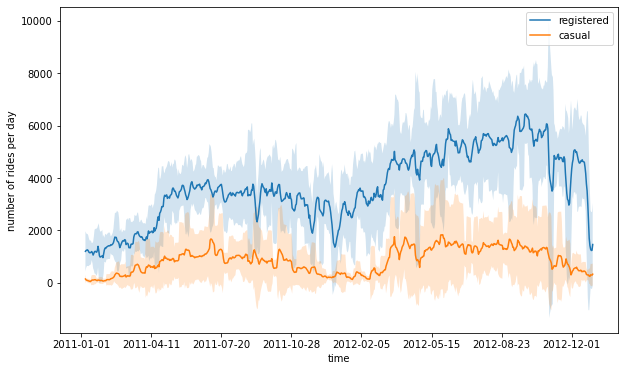

In [9]:
# Creating a new dataframe for plotting columns, and obtaining number
# of rides per day, by grouping over each day
plot_data = preprocessed_data[["registered", "casual", "dteday"]]
plot_data = plot_data.groupby("dteday").sum()

# Defining window for computing the rolling mean and standard deviation
window = 7
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()

# Creating a plot of the series, where we first plot the series of
# rolling means, then colouring the zone between the series of
# rolling means +- 2 rolling standard deviations
ax = rolling_means.plot(figsize=(10, 6))
ax.fill_between(
    rolling_means.index,
    rolling_means["registered"] + 2 * rolling_deviations["registered"],
    rolling_means["registered"] - 2 * rolling_deviations["registered"],
    alpha=0.2,
)
ax.fill_between(
    rolling_means.index,
    rolling_means["casual"] + 2 * rolling_deviations["casual"],
    rolling_means["casual"] - 2 * rolling_deviations["casual"],
    alpha=0.2,
)
ax.set_xlabel("time")
ax.set_ylabel("number of rides per day")
plt.savefig(f"{assets_path}/rides_aggregated.png", format="png")

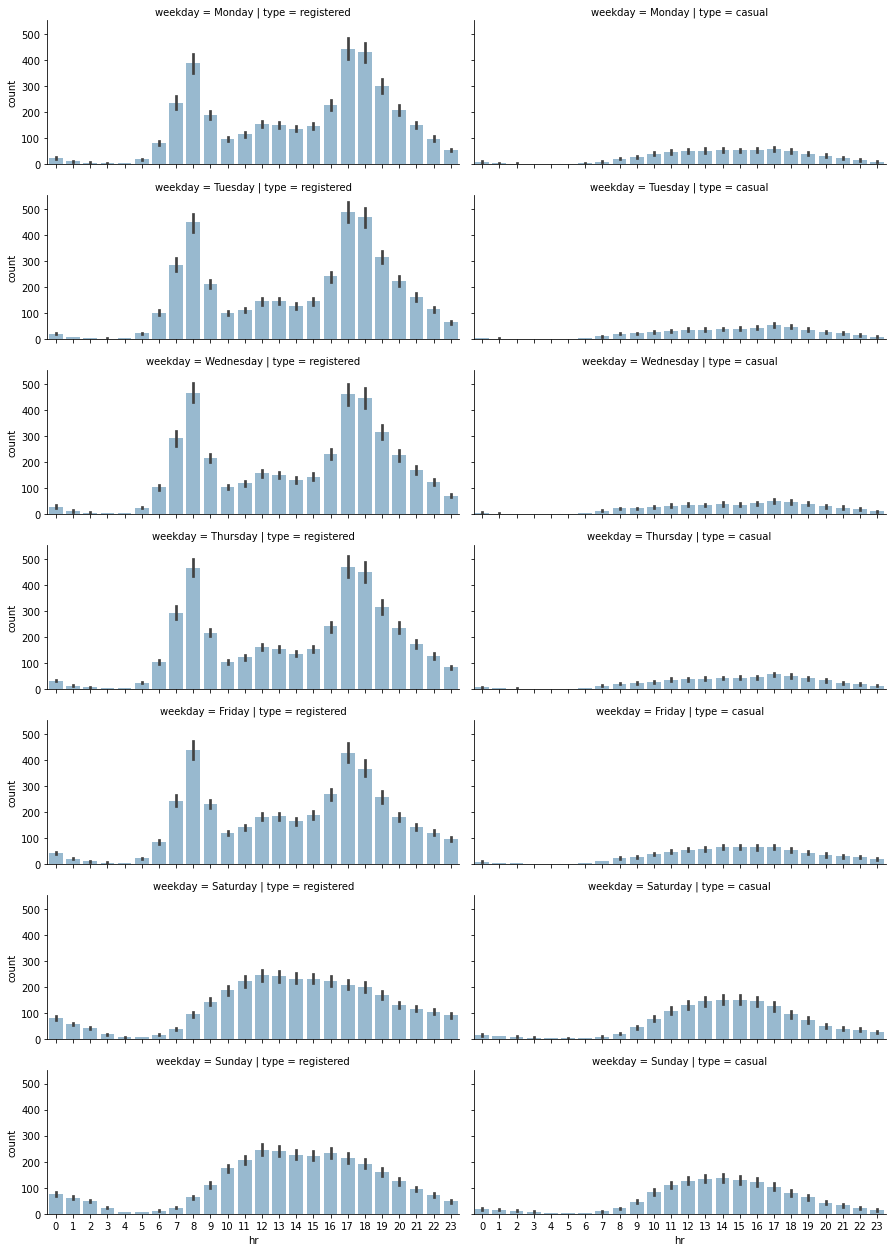

In [10]:
# Selecting relevant columns
plot_data = preprocessed_data[["hr", "weekday", "registered", "casual"]]

# Transforming the data into a format, in number of entries are computed
# as count, for each distinct hr, weekday and type (registered or casual)
plot_data = plot_data.melt(
    id_vars=["hr", "weekday"], var_name="type", value_name="count"
)

# Creating a FacetGrid object, in which a grid plot is produced.
# As columns, we have the various days of the week, as rows, the different
# types (registered and casual)
grid = sns.FacetGrid(
    plot_data,
    row="weekday",
    col="type",
    height=2.5,
    aspect=2.5,
    row_order=[
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ],
)

# Populating the FacetGrid with the specific plots
grid.map(sns.barplot, "hr", "count", alpha=0.5)
grid.savefig(f"{assets_path}/weekday_hour_distributions.png", format="png")

<a id="seasonal-impact"></a>
## Analysing seasonal impact on rides

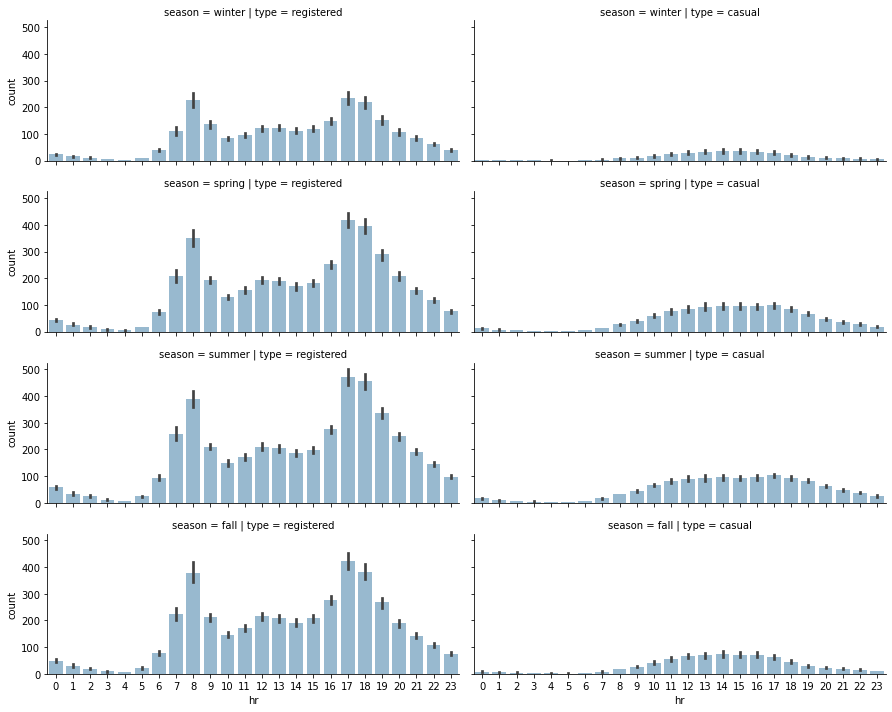

In [11]:
# Selecting subset of the data
plot_data = preprocessed_data[["hr", "season", "registered", "casual"]]

# Unpivoting data from wide to long format
plot_data = plot_data.melt(
    id_vars=["hr", "season"], var_name="type", value_name="count"
)

# Defining FacetGrid
grid = sns.FacetGrid(
    plot_data,
    row="season",
    col="type",
    height=2.5,
    aspect=2.5,
    row_order=["winter", "spring", "summer", "fall"],
)

# Applying plotting function to each element in the grid
grid.map(sns.barplot, "hr", "count", alpha=0.5)

# Saving figure
grid.savefig(f"{assets_path}/season_impact_a.png", format="png")

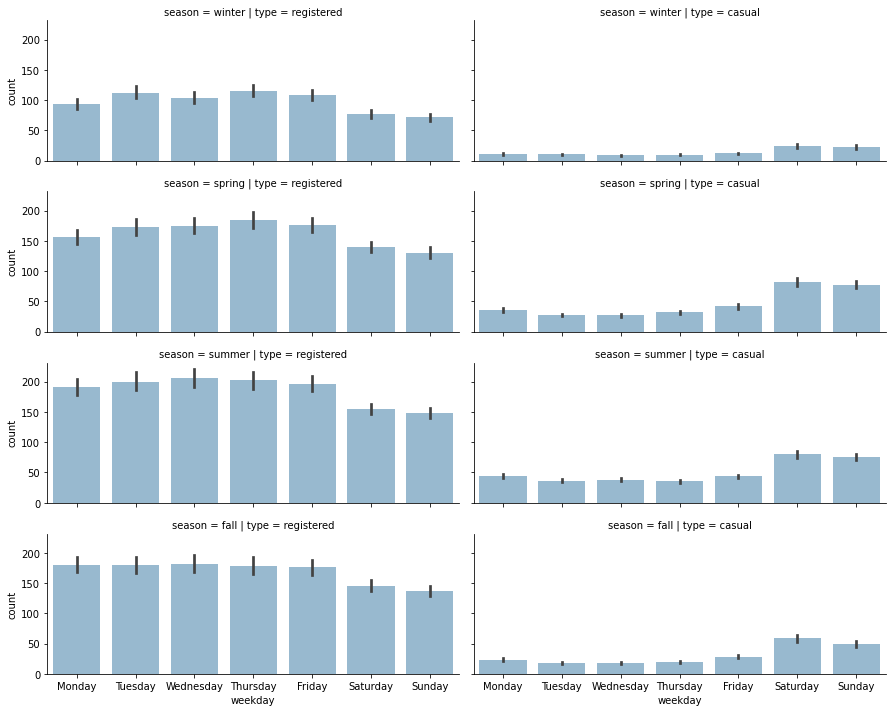

In [12]:
plot_data = preprocessed_data[["weekday", "season", "registered", "casual"]]
plot_data = plot_data.melt(
    id_vars=["weekday", "season"], var_name="type", value_name="count"
)

grid = sns.FacetGrid(
    plot_data,
    row="season",
    col="type",
    height=2.5,
    aspect=2.5,
    row_order=["winter", "spring", "summer", "fall"],
)
grid.map(
    sns.barplot,
    "weekday",
    "count",
    alpha=0.5,
    order=[
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ],
)

# Saving figure
grid.savefig(f"{assets_path}/season_impact_b.png", format="png")